# ДЗ 2. Неронные сети

## Задание 1

Попробуйте обучить, нейронную сеть на Keras(рассмотренную на уроке) на датасете MNIST с другими параметрами. 
Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [16]:
# The full neural network code!
###############################
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import datetime
import time

In [17]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [50]:
# пользовательская функция для расчёта точности предсказания
def check_accuracy(fact, pred):
    acc = 0
    errors = 0
    for x in range(len(fact)):
        fact_x = fact[x]
        pred_x = pred[x]
        if fact_x != pred_x:
            errors +=1
    attempts_qty = x+1
    acc = (attempts_qty-errors)/attempts_qty
    return acc

In [53]:
# задаём параметры для перебора
layer1 = [16, 64, 256]
layer2 = [16, 64, 256]
epochs = [5,15,50]
batches = [16, 64, 256]

In [54]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [55]:
# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [59]:
%%time
# организуем цикл с перебором параметров
counter = 1
results =[]
for layer_one in layer1:
    for layer_two in layer2:
        for epoch_qty in epochs:
            for batch_qty in batches:
                
                start_time = time.time()
                
                # Build the model.
                model = Sequential([
                  Dense(layer_one, activation='relu', input_shape=(784,)),
                  Dense(layer_two, activation='relu'),
                  Dense(10, activation='softmax'),
                ])
                
                # Compile the model.
                model.compile(
                  optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'],
                )
                
                # Train the model.
                model.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epoch_qty,
                  batch_size=batch_qty,
                    verbose = 0
                )
                
                qty = 5000 # кол-во объектов, которые будем предсказывать

                # Predict on the first 5 test images.
                predictions = model.predict(test_images[:qty])
                # print(predictions)

                # Print our model's predictions.
                predicted = np.argmax(predictions, axis=1)
                # print(predicted)

                # Check our predictions against the ground truths.
                fact_labels = test_labels[:qty]
                
                acc = check_accuracy(fact_labels, predicted)
                
                
#                 # Evaluate the model.
#                 loss, acc = model.evaluate(
#                   test_images,
#                   to_categorical(test_labels)
#                 )
            
                execution_time = time.time()-start_time
                item = {'counter':counter, '1st_layer_qty':layer_one, '2nd_layer_qty':layer_two, 'epochs':epoch_qty,
                        'batch_qty':batch_qty, 'acc':acc, 'time':execution_time}
                print(item)
                results.append(item)
                counter +=1

{'counter': 1, '1st_layer_qty': 16, '2nd_layer_qty': 16, 'epochs': 5, 'batch_qty': 16, 'acc': 0.9378, 'time': 14.190089225769043}
{'counter': 2, '1st_layer_qty': 16, '2nd_layer_qty': 16, 'epochs': 5, 'batch_qty': 64, 'acc': 0.9288, 'time': 4.855035781860352}
{'counter': 3, '1st_layer_qty': 16, '2nd_layer_qty': 16, 'epochs': 5, 'batch_qty': 256, 'acc': 0.917, 'time': 2.561598300933838}
{'counter': 4, '1st_layer_qty': 16, '2nd_layer_qty': 16, 'epochs': 15, 'batch_qty': 16, 'acc': 0.9376, 'time': 40.64923024177551}
{'counter': 5, '1st_layer_qty': 16, '2nd_layer_qty': 16, 'epochs': 15, 'batch_qty': 64, 'acc': 0.942, 'time': 13.21131181716919}
{'counter': 6, '1st_layer_qty': 16, '2nd_layer_qty': 16, 'epochs': 15, 'batch_qty': 256, 'acc': 0.9438, 'time': 6.148969888687134}
{'counter': 7, '1st_layer_qty': 16, '2nd_layer_qty': 16, 'epochs': 50, 'batch_qty': 16, 'acc': 0.943, 'time': 145.3242130279541}
{'counter': 8, '1st_layer_qty': 16, '2nd_layer_qty': 16, 'epochs': 50, 'batch_qty': 64, 'acc'

{'counter': 64, '1st_layer_qty': 256, '2nd_layer_qty': 64, 'epochs': 5, 'batch_qty': 16, 'acc': 0.9676, 'time': 38.266382694244385}
{'counter': 65, '1st_layer_qty': 256, '2nd_layer_qty': 64, 'epochs': 5, 'batch_qty': 64, 'acc': 0.972, 'time': 15.486589908599854}
{'counter': 66, '1st_layer_qty': 256, '2nd_layer_qty': 64, 'epochs': 5, 'batch_qty': 256, 'acc': 0.9702, 'time': 7.317590236663818}
{'counter': 67, '1st_layer_qty': 256, '2nd_layer_qty': 64, 'epochs': 15, 'batch_qty': 16, 'acc': 0.973, 'time': 120.29084014892578}
{'counter': 68, '1st_layer_qty': 256, '2nd_layer_qty': 64, 'epochs': 15, 'batch_qty': 64, 'acc': 0.9726, 'time': 39.76377010345459}
{'counter': 69, '1st_layer_qty': 256, '2nd_layer_qty': 64, 'epochs': 15, 'batch_qty': 256, 'acc': 0.973, 'time': 25.819826364517212}
{'counter': 70, '1st_layer_qty': 256, '2nd_layer_qty': 64, 'epochs': 50, 'batch_qty': 16, 'acc': 0.9746, 'time': 430.97136402130127}
{'counter': 71, '1st_layer_qty': 256, '2nd_layer_qty': 64, 'epochs': 50, 'b

In [88]:
# создаём датафрейм из результатов
import pandas as pd
results_df = pd.DataFrame(results)
results_df.drop(columns="counter", inplace = True)
results_df.head(2)

,1st_layer_qty,2nd_layer_qty,epochs,batch_qty,acc,time
0,16,16,5,16,0.9378,14.190089
1,16,16,5,64,0.9288,4.855036


In [83]:
# попробуем визуализировать взаимосвязи данных между собой
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing

In [84]:
cols = ['1st_layer_qty','2nd_layer_qty','epochs','batch_qty','acc', 'time']

In [85]:
# делаем нормализацию
x = results_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = cols)

In [89]:
df.head(3)

,1st_layer_qty,2nd_layer_qty,epochs,batch_qty,acc,time
0,0.0,0.0,0.0,0.0,0.348993,0.017136
1,0.0,0.0,0.0,0.2,0.197987,0.003525
2,0.0,0.0,0.0,1.0,0.000000,0.000182


In [90]:
# создаём вектора для отображения на графике
accuracy_vector = df['acc']
layer1_v = df['1st_layer_qty']
layer2_v = df['2nd_layer_qty']
epochs_v = df['epochs']
batch_v = df['batch_qty']
time_v = df['time']

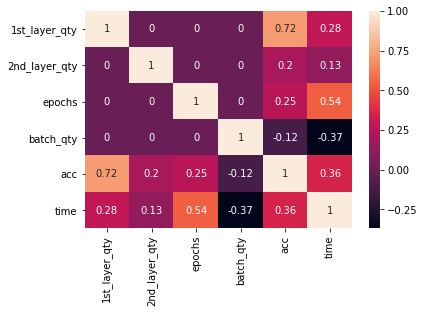

In [91]:
corrMatrix = results_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Итоги и выводы:

* на построенной диаграмме видна взаимосвязь между затраченным временем и кол-вом эпох = чем больше эпох обучения, тем больше времени требуется. Также обратная корреляция с параметром "batch": чем больше batch в модели, тем меньшее время потребуется 
* точность модели на использованных данных зависит от кол-ва нейронов первого слоя в большей степени, а также немного от кол-ва эпох обучения
* Параметры второго слоя мало повлияли на результаты работы сети, некоторое влияние второй слой оказал на точность

## Задание 2

Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.

"Поработал" с документацией Keras. Она оказалась очень объёмной! Возможно, train_on_batch() будет решать какие-то задачи, когда объём работы слишком большой? Оценить работоспособность модели, кода и т.д.?

In [101]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [105]:
model.train_on_batch(train_images, to_categorical(train_labels))

[2.253678560256958, 0.15410000085830688]

In [106]:
qty = 5000 # кол-во объектов, которые будем предсказывать

# Predict on the first 5 test images.
predictions = model.predict(test_images[:qty])
# print(predictions)

# Print our model's predictions.
predicted = np.argmax(predictions, axis=1)
# print(predicted)

# Check our predictions against the ground truths.
fact_labels = test_labels[:qty]

acc = check_accuracy(fact_labels, predicted)

In [107]:
print(f'точность: {acc}')

точность: 0.1932


## Итоги, выводы:

* точность вообще никакая, поэтому пользу от использования этого метода надо искать за пределами стандартных целей применения нейронных сетей: например, проверить, работсопобность кода

Также мне показалось любопытной и полезной возможность генерить пользовательские данные и обучать на них модель: fit_generator() + predict_generator()